# ML Tutorial Day 7

We will see how to split the available data into training and testing data for better accuracy, as training the model on the entire dataset is not good.

In [9]:
import pandas as pd
from sklearn import linear_model as linMod

df = pd.read_csv('carprices.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


So we split the data, train the model on `training data` and then test the performance of the model on the `testing data` as the model hasn't seen the samples, and would give a realistic sense of the model's performance.

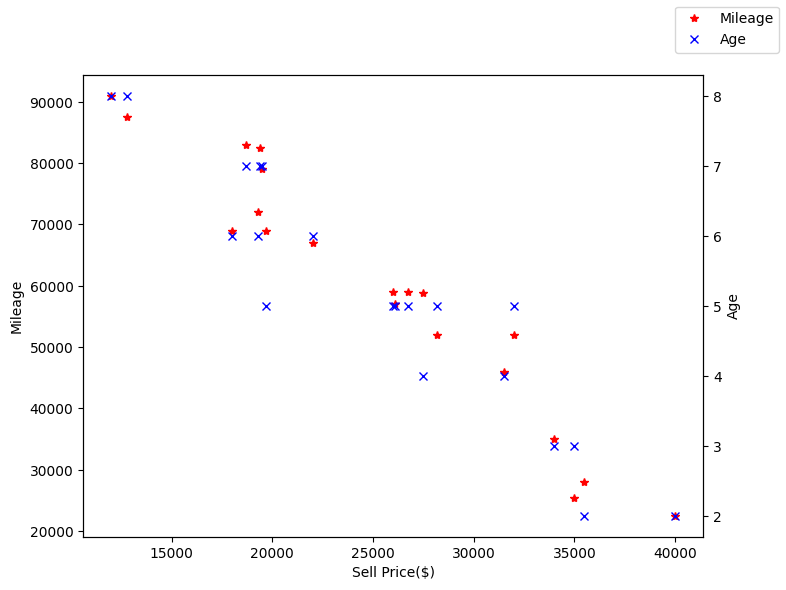

In [31]:
# understanding the relation between the independent and dependent variables
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.plot(df['Sell Price($)'], df['Mileage'], 'r*', label='Mileage')
ax2.plot(df['Sell Price($)'], df['Age(yrs)'], 'bx', label='Age')
ax1.set_xlabel('Sell Price($)')
ax1.set_ylabel('Mileage')
ax2.set_ylabel('Age')
fig.legend()
plt.show()

In [32]:
# preparing the datasets for training
X = df[['Mileage', 'Age(yrs)']]
y = df['Sell Price($)']

Now we will split the entire data into `training` and `testing` datasets. 

In [ ]:
# test-train split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)
# random_state parameter works as a seed that remembers the last random distribution of data
# checking the size of datasets
print(f"Length of the training dataset is: {len(X_train)} \nLength of testing dataset is: {len(X_test)}")



Length of the training dataset is: 16 
Length of testing dataset is: 4


In [45]:
# training the linear regression model
reg = linMod.LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
# testing the model
vals = reg.predict(X_test)
print([int(i) for i in vals])
print([i for i in y_test])
print([int(i) for i in vals - y_test])

[22686, 14423, 27761, 15492]
[22000, 12000, 32000, 12800]
[686, 2423, -4238, 2692]


In [63]:
# accuracy of the model
reg.score(X_test, y_test)

0.8802162600062088